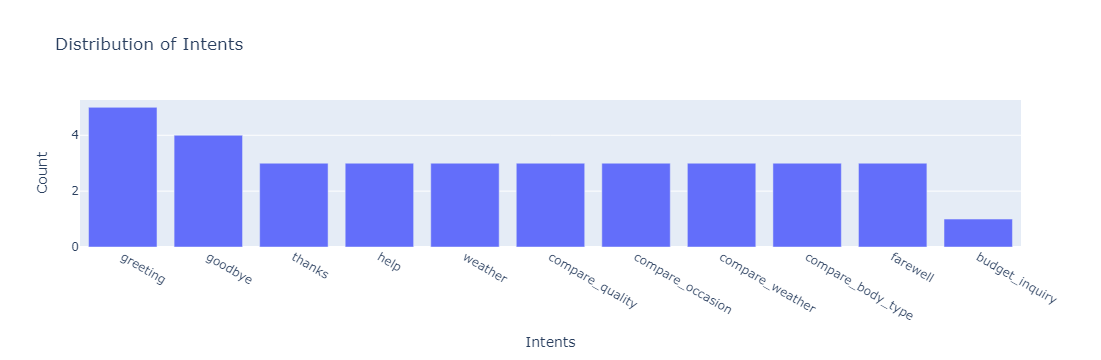

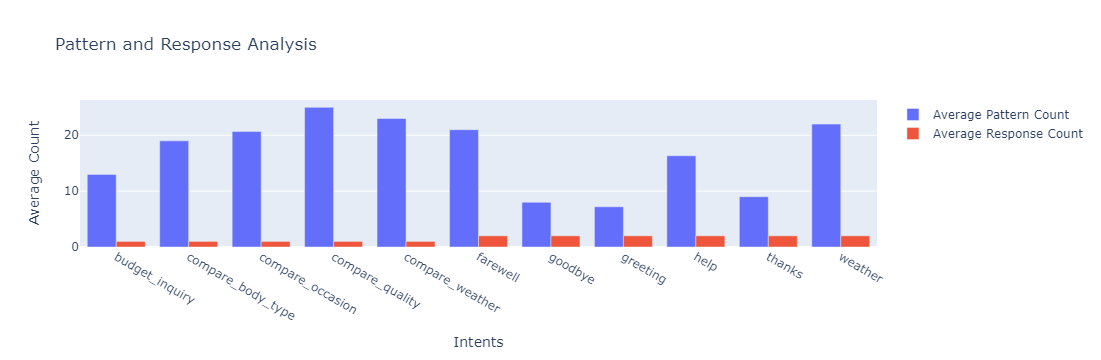

Model Accuracy: 28.57%


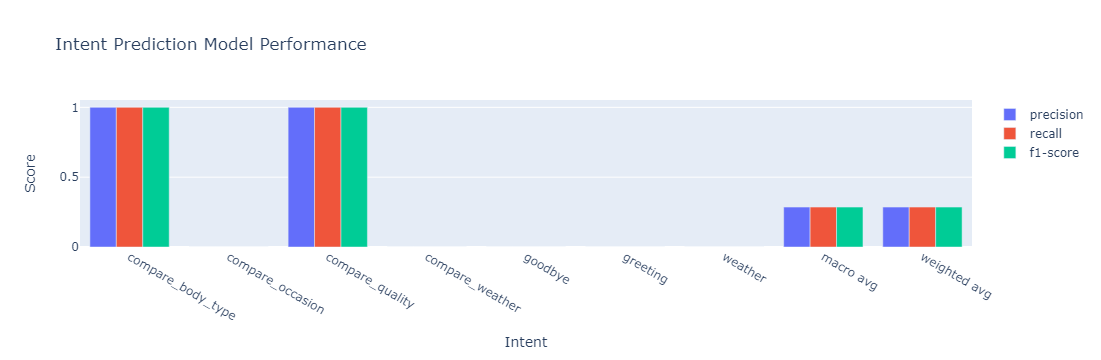

Chatbot: Hello! How can I help you today?


User:  compare based on quality


Chatbot: select cotton,crepe


User:  cotton


Chatbot: Hello! How can I help you?


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import json

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df


df['tag'].unique()

import plotly.graph_objects as go

import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import plotly.graph_objects as go

from sklearn.metrics import accuracy_score

X = df['patterns']
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
model = SVC()
model.fit(X_train_vec, y_train)

# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")


# In[14]:


# Import necessary libraries2/
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import classification_report, accuracy_score
# import pandas as pd

# # Sample data: Scenarios with mood labels
# data = {
#     'scenario': [
#         'I am feeling great today!',
#         'I just got my first job',
#         'I had a great time in the part',
#         'I am excited for the upcoming holiday.',
#         'I got my first salary',
#         'I am had a good day',
#         'My cat died today',
#         'My exam went bad',
#         'I lost my phone',
#         'I had an accident',
#         'My favourite vase broke'
#     ],
#     'mood': ['happy', 'happy', 'happy', 'happy','happy','happy','sad','sad','sad','sad','sad']
# }

# # Convert data to DataFrame
# df = pd.DataFrame(data)

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['scenario'], df['mood'], test_size=0.2, random_state=42)

# # Vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

# # Define a parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'linear', 'poly']
# }

# # Initialize the SVM classifier
# model = SVC()

# # Perform grid search to find the best hyperparameters
# # Adjust the number of folds (cv) to match the size of your training set
# grid_search = GridSearchCV(model, param_grid, cv=min(2, len(X_train)))
# grid_search.fit(X_train_vec, y_train)

# # Get the best model from the grid search
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test_vec)

# # Print the classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Print the accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred))




# In[15]:


# Split the dataset into training and testing sets
X = df['patterns']
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
model = SVC()
model.fit(X_train_vec, y_train)

# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert float values in the report to dictionaries
report = {label: {metric: report[label][metric] for metric in report[label]} for label in report if isinstance(report[label], dict)}

# Extract evaluation metrics
labels = list(report.keys())
evaluation_metrics = ['precision', 'recall', 'f1-score']
metric_scores = {metric: [report[label][metric] for label in labels if label in report] for metric in evaluation_metrics}

# Visualize the model's performance using a Plotly bar plot
fig = go.Figure()
for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=labels, y=metric_scores[metric]))

fig.update_layout(title='Intent Prediction Model Performance',
                  xaxis_title='Intent',
                  yaxis_title='Score',
                  barmode='group')

fig.show()


# In[16]:


import random
import json
import vectorizers
# Prediction Model Deployment

# A trained SVM model named 'model' and a vectorizer named 'vectorizer'
# Function to predict intents based on user input
def predict_intent(user_input):
    # Vectorize the user input
    user_input_vec = vectorizer.transform([user_input])

    # Predict the intent
    intent = model.predict(user_input_vec)[0]

    return intent

def generate_response(intent):
    dat = df.loc[df["tag"] == intent, ["responses", "response_count"]]
    
    if dat.empty:
        return "Sorry, I couldn't find a response for that intent."
    
    rcount = dat.iloc[0]["response_count"]
    if rcount <= 0:
        return "Sorry, there are no responses available for that intent."
    
    randint = random.randint(0, rcount - 1)
    responses = dat.iloc[0]["responses"]
    if isinstance(responses, list) and len(responses) > randint:
        return responses[randint]
    else:
        return "Sorry, there was an issue with generating a response."
   @app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    user_input = data['user_input']
    intent = predict_intent(user_input)
    response = generate_response(intent)
    return jsonify({'message': response})

if __name__ == '__main__':
    app.run(debug=True) 
# Example usage
# print("Chatbot: Hello! How can I help you today?")
# while True:
#     user_input = input("User: ")
#     if user_input.lower() == 'exit':
#         print("Chatbot: Goodbye!")
#         break
#     intent = predict_intent(user_input)
#     response = generate_response(intent)
#     data = {'message': response}
#     with open('data.json', 'w') as json_file:
#         json.dump(data, json_file)
#     print("Chatbot:", response)
# In[ ]:




